<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Anova_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all libraries

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import f
import scipy.stats as stats
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", color_codes=True, rc={'figure.figsize':(15,8)})

# All Required Functions

In [46]:
# Function to calculate F_stat and give result as rejecting or fail to rejecting Null hypothesis

def anova_test(data, alpha):
  """
  Performs annova test and prints hypothesis for means of given datas are same or not

  data: list of list of data
  alpha: significance level

  return: f_stat, f_crit and p_value
  """


  # Calculate number of elements in each group
  counts = [len(x) for x in data]

  # Calculate means of each dataset
  means = [np.mean(x) for x in data]

  # Calculate overall mean
  overall_mean = np.mean(np.concatenate(data))

  # Find degree of freedom, within and between groups
  dfb = len(data) - 1
  dfw = sum([len(x) for x in data]) - len(data)

  # Calculate sum of squares between groups and sum of squares within groups
  ssb = 0
  ssw = 0
  for i in range(len(data)):
    ssb += counts[i] * (means[i] - overall_mean)**2
    for j in range(len(data[i])):
      ssw += (data[i][j] - means[i])**2

  # Mean square between groups and mean square within groups
  msb = ssb / dfb
  msw = ssw / dfw

  #  Calculate F statistics
  f_stat = msb / msw

  # calculate F critical
  f_crit = f.ppf(1 - alpha, dfb, dfw)

  p_value = 1 - f.cdf(f_stat, dfb, dfw)

  if f_stat > f_crit:
    print(f"Since the calculated F-statistic ({f_stat: .3f}) is greater than the critical value ({f_crit: .3f}), we reject the null hypothesis.")
  else:
    print(f"Since the calculated F-statistic ({f_stat:.3f}) is less than the critical value ({f_crit:.3f}), we fail to reject the null hypothesis.")

  return f_stat, f_crit, p_value

In [44]:
# Function for visualizing process of anova test\

# Colors  for means of each groups
mean_colors = ['blue', 'green', 'purple', 'orange', 'pink', 'violet']

def anova_test_vis(data, alpha):
  scores = [score for group in data for score in group]
  groups = sum([[chr(65 + i)] * len(group) for i, group in enumerate(data)], [])

  df = pd.DataFrame({'Group': groups, 'Score': scores})

  # Perform ANOVA
  anova_result = stats.f_oneway(*data)

  # Calculate group means
  means = df.groupby('Group')['Score'].mean().reset_index()
  overall_mean = df['Score'].mean()

  # Plot using KDE plots
  plt.figure(figsize=(10, 6))

  for label, group in df.groupby('Group'):
      sns.kdeplot(group['Score'], label=f'Group {label}', fill=True)

  # Annotate means
  for i, (group, mean) in enumerate(means.itertuples(index=False)):
      plt.axvline(mean, linestyle='--', color=mean_colors[i], alpha=0.7, label=f'{group} Mean: {mean:.2f}')
      # plt.text(mean, plt.ylim()[1] * 0.7, f'{group} Mean: {mean:.2f}', color='blue', weight='semibold')

  # Annotate overall mean
  plt.axvline(overall_mean, color='red', linestyle='--', label=f'Overall Mean: {overall_mean:.2f}')
  # plt.text(overall_mean, plt.ylim()[1] * 0.9, f'Overall Mean: {overall_mean:.2f}', color='red', weight='semibold')

  # Display F-statistic
  plt.title(f'ANOVA Test\nF-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}')
  plt.xlabel('Score')
  plt.ylabel('Density')
  plt.legend()
  plt.show()

# Anova Testing

## Example 1

Suppose a researcher wants to determine if there are significant differences in the average scores of three different teaching methods on students' performance. The three methods are:

1.   Traditional Lecture (Group A)
2.   Interactive Workshop (Group B)
3.   Online Course (Group C)

|      | Traditional Lecture | Interactive Workshop | Online Course |
|------|---------------------|----------------------|---------------|
|      |          85         |          80          |       75      |
|      |          90         |          85          |       78      |
|      |          78         |          88          |       82      |
|      |          92         |          90          |       84      |
|      |          88         |          86          |       80      |
| Mean |      <b>86.6</b>    |      <b>85.8</b>     |   <b>79.8</b> |

1. Calculate the Overall Mean: <br />

2. Overall Mean: (85 + 90 + 78 + 92 + 88 + 80 + 85 + 88 + 90 + 86 + 75 + 78 + 82 + 84 + 80) / 15 = 84.2 <br />

3. Calculate sum of squares between groups:

  $  SSB =  n_A (\overline{X}_A - \overline{X})^2 + n_B (\overline{X}_B - \overline{X})^2 + n_C (\overline{X}_C - \overline{X})^2
  $

  $
  SSB = 5(86.6 - 84.2)^2 + 5(85.8 - 84.2)^2 + 5(79.8 - 84.2)^2
  $

  $
  SSB = 5(2.4)^2 + 5(1.6)^2 + 5(-4.4)^2
  $

  $
  SSB = 5(5.76) + 5(2.56) + 5(19.36) = 28.8 + 12.8 + 96.8 = 138.4
  $

4. Calculate the Sum of Squares Within Groups (SSW):
  $
  SSW = \sum_{i=1}^{n_A} (X_i - \overline{X}_A)^2 + \sum_{i=1}^{n_B} (X_i - \overline{X}_B)^2 + \sum_{i=1}^{n_C} (X_i - \overline{X}_C)^2
  $

  $
  SSW = ((85 - 86.6)^2 + (90 - 86.6)^2 + (78 - 86.6)^2 + (92 - 86.6)^2 + (88 - 86.6)^2) + ((85 - 84.2)^2 + (90 - 84.2)^2 + (78 - 84.2)^2 + (92 - 84.2)^2 + (88 - 84.2)^2)
  $

  $
  SSW = (2.56 + 11.56 + 74.56 + 28.96 + 2.56) + (33.64 + 0.64 + 4.84 + 17.64 + 0.04)
  $

  $
  SSW = 120.2 + 56.8 + 48.8 = 225.8
  $<br/>

5. Calculate the Degrees of Freedom:

  Between Groups (dfb): k - 1 = 3 - 1 = 2<br />
  Within Groups (dfw): N - k = 15 - 3 = 12

6. Calculate the Mean Squares:

  Mean Square Between Groups (MSB): SSB / dfb = 138.4 / 2 = 69.2 <br />
  Mean Square Within Groups (MSW): SSW / dfw = 225.8 / 12 = 18.82

7. Calculate the F-statistic:

  $
  F = \frac{MSB}{MSW} = \frac{69.2}{18.82} \approx 3.68
  $

8.  $ F $ <sub>critical</sub>  =  3.89

9.
      Since the calculated F-statistic (3.68) is less than the critical value (3.89), we fail to reject the null hypothesis.








In [3]:
df = pd.DataFrame([[85, 90, 78, 92, 88], [80, 85, 88, 90, 86], [75, 78, 82, 84, 80]]).T
df.columns = ['Traditional Lecture', 'Interactive Workshop', 'Online Course']
df

,Traditional Lecture,Interactive Workshop,Online Course
0,85,80,75
1,90,85,78
2,78,88,82
3,92,90,84
4,88,86,80


In [27]:
data = [[85, 90, 78, 92, 88], [80, 85, 88, 90, 86], [75, 78, 82, 84, 80]]
data

[[85, 90, 78, 92, 88], [80, 85, 88, 90, 86], [75, 78, 82, 84, 80]]

In [28]:
means = [np.mean(x) for x in data]
counts = [len(x) for x in data]
means, counts

([86.6, 85.8, 79.8], [5, 5, 5])

In [29]:
overall_mean = np.mean(np.concatenate(data))
overall_mean

84.06666666666666

In [30]:
ssb = 0
for i in range(len(data)):
  ssb += counts[i] * (means[i] - overall_mean)**2
ssb

138.13333333333327

In [31]:
ssw = 0
for i in range(len(data)):
  for j in range(len(data[i])):
    ssw += (data[i][j] - means[i])**2
ssw

224.79999999999993

In [32]:
# Find degree of freedom, within and between groups
dfb = len(data) - 1
dfw = sum([len(x) for x in data]) - len(data)
dfb, dfw

(2, 12)

In [33]:
# Mean square between groups and mean square within groups
msb = ssb / dfb
msw = ssw / dfw
msb, msw

(69.06666666666663, 18.733333333333327)

In [34]:
#  Calculate F statistics
f_stat = msb / msw
f_stat

3.686832740213523

In [35]:
# calculate F critical
f_crit = f.ppf(1 - 0.05, dfb, dfw)
f_crit

3.8852938346523933

In [36]:
if f_stat > f_crit:
  print(f"Since the calculated F-statistic ({f_stat: .3f}) is greater than the critical value ({f_crit: .3f}), we reject the null hypothesis.")
else:
  print(f"Since the calculated F-statistic ({f_stat:.3f}) is less than the critical value ({f_crit:.3f}), we fail to reject the null hypothesis.")

Since the calculated F-statistic (3.687) is less than the critical value (3.885), we fail to reject the null hypothesis.


In [47]:
anova_test(data, alpha=0.05)

Since the calculated F-statistic (3.687) is less than the critical value (3.885), we fail to reject the null hypothesis.


(3.686832740213523, 3.8852938346523933, 0.056469858113640914)

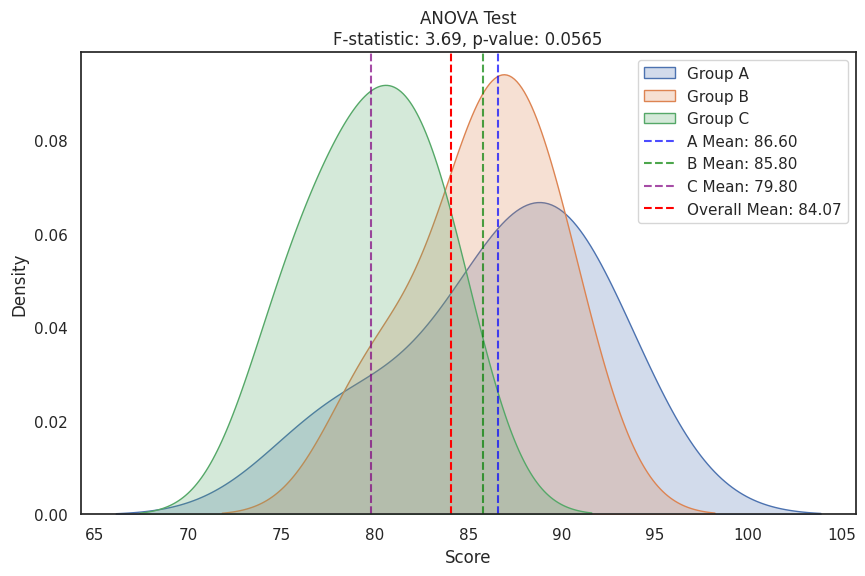

In [45]:
anova_test_vis(data, alpha=0.05)

## Example 2

You are a marketing manager comparing the effectiveness of three different marketing campaigns (Email, Social Media, TV) on sales revenue. After running the campaigns for a month, you collect sales revenue data (in thousands of dollars) for each campaign.


| Campaign     | Sales Revenue (k$) |
|--------------|--------------------|
| Email	       | 50, 55, 52, 48, 53 |
| Social Media | 60, 62, 61, 59, 63 |
| TV	         | 70, 72, 69, 71, 73 |


<b> Goal: </b> Determine if there are significant differences in sales revenue generated by the three campaigns.

---

Null Hypothesis:  $ H_0 $  : The mean sales revenue is the same for all campaigns. <br />
Alternate hypothesis:  $ H_a $ : At least one campaign leads to a different mean sales revenue. <br />

α = 0.05

In [48]:
data = [[50, 55, 52, 48, 53], [60, 62, 61, 59, 63], [70, 72, 69, 71, 73]]
alpha = 0.05
data

[[50, 55, 52, 48, 53], [60, 62, 61, 59, 63], [70, 72, 69, 71, 73]]

In [49]:
anova_test(data, alpha)

Since the calculated F-statistic ( 114.780) is greater than the critical value ( 3.885), we reject the null hypothesis.


(114.780487804878, 3.8852938346523933, 1.5028887245804867e-08)

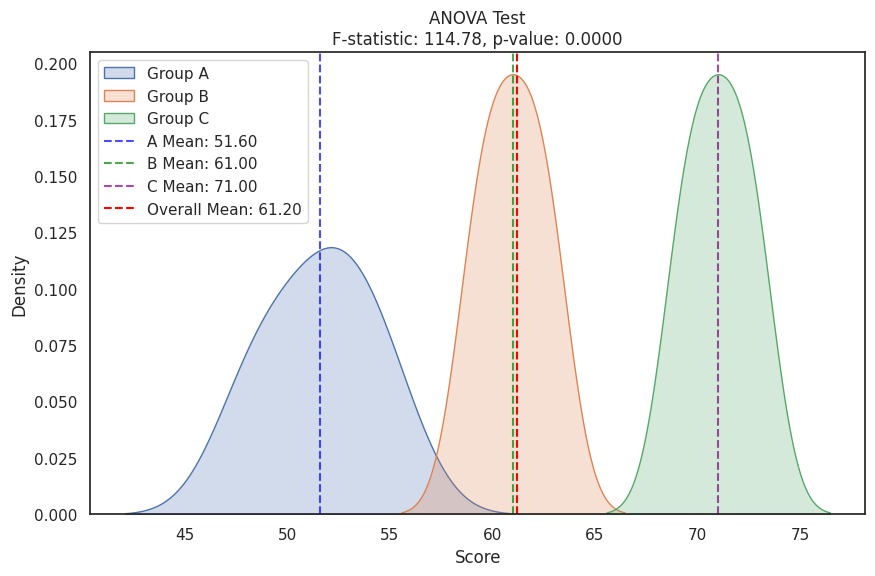

In [50]:
anova_test_vis(data, alpha)

## Example 3